<a href="https://colab.research.google.com/github/michaelraef12/Data-Mining-Projects/blob/main/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/telecom_churn.csv')

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
df.shape

(7032, 21)

In [ ]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,SeniorCitizen,tenure
count,7032.00,7032.00
mean,0.16,32.42
std,0.37,24.55
min,0.00,1.00
25%,0.00,9.00
50%,0.00,29.00
75%,0.00,55.00
max,1.00,72.00


In [ ]:
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [ ]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("_________________________________")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
_________________________________
gender : ['Female' 'Male']
_________________________________
SeniorCitizen : [0 1]
_________________________________
Partner : ['Yes' 'No']
_________________________________
Dependents : ['No' 'Yes']
_________________________________
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
_________________________________
PhoneService : ['No' 'Yes']
_________________________________
MultipleLines : ['No phone service' 'No' 'Yes']
_________________________________
InternetService : ['DSL' 'Fiber optic' 'No']
_________________________________
OnlineSecurity : ['No' 'Yes' 'No internet service']
_________________________________
OnlineBackup : ['Yes' 'No' 'No internet service']
____________

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("_____________________________________________")

customerID: Number of unique values 6976
_____________________________________________
gender: Number of unique values 2
_____________________________________________
SeniorCitizen: Number of unique values 2
_____________________________________________
Partner: Number of unique values 2
_____________________________________________
Dependents: Number of unique values 2
_____________________________________________
tenure: Number of unique values 72
_____________________________________________
PhoneService: Number of unique values 2
_____________________________________________
MultipleLines: Number of unique values 3
_____________________________________________
InternetService: Number of unique values 3
_____________________________________________
OnlineSecurity: Number of unique values 3
_____________________________________________
OnlineBackup: Number of unique values 3
_____________________________________________
DeviceProtection: Number of unique values 3
____________________

## Data Cleaning


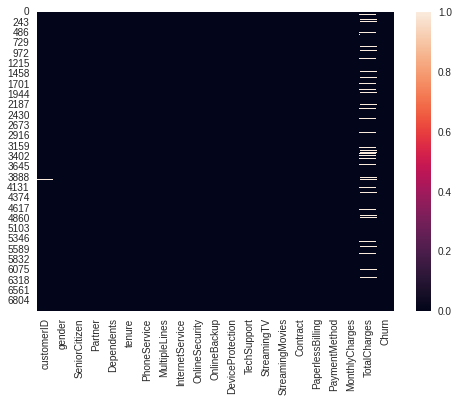

In [ ]:
df.isnull().sum()
sns.heatmap(df.isnull())

In [ ]:
#replacing the null values of the customer id with unknown values due to each customer having their unique id 
df["customerID"] = df["customerID"].replace( {np.nan : "Unknown"})
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [ ]:
#removing unnecessary character in monthly charges and converting from object into float
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$','')
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m','')
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)  


<ipython-input-55-4c47fde3d9e0>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$','')


In [ ]:
#removing unnecessary characters in total charges and converting into type float
df['TotalCharges'] = df['TotalCharges'].str.replace('$','')
df['TotalCharges'] = df['TotalCharges'].astype(float) 

<ipython-input-56-d0b3532a1410>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TotalCharges'] = df['TotalCharges'].str.replace('$','')


To explain the following lines of code and offer an understanding of how we replaced the null values in the Total Charges column. Firstly each null value was replaced with 0 and then we used the tenure at index of each null value multiplied by the monthly charges at index of each null value and then the product replaces the 0 values. This is due to the fact that the mean and mode cannot be used to fill in the missing values. Moreover, this results in the most accurate prediction and estimation of the missing null values


In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace( { np.nan : 0})

In [ ]:
total = df['TotalCharges'] == 0.00
total

0       False
1       False
2       False
3       False
4       False
        ...  
7027    False
7028    False
7029    False
7030    False
7031    False
Name: TotalCharges, Length: 7032, dtype: bool

In [ ]:

total = df['TotalCharges'] == 0.00 
for i, val in total.items():
  if val == True:
    #print(i, val)
    df.at[i, 'TotalCharges'] = df.at[i,'tenure'] * df.at[i, 'MonthlyCharges']



In [ ]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

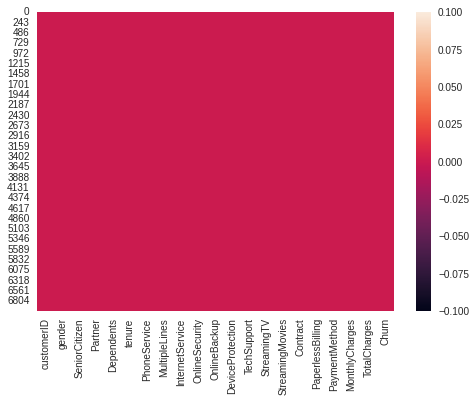

In [ ]:
sns.heatmap(df.isnull())

In [ ]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object) 


In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("_____________________________________")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
_____________________________________
gender : ['Female' 'Male']
_____________________________________
SeniorCitizen : [0 1]
_____________________________________
Partner : ['Yes' 'No']
_____________________________________
Dependents : ['No' 'Yes']
_____________________________________
PhoneService : ['No' 'Yes']
_____________________________________
MultipleLines : ['No phone service' 'No' 'Yes']
_____________________________________
InternetService : ['DSL' 'Fiber optic' 'No']
_____________________________________
OnlineSecurity : ['No' 'Yes' 'No internet service']
_____________________________________
OnlineBackup : ['Yes' 'No' 'No internet service']
_____________________________________
DeviceProtection : ['No' 'Yes' 'No internet service']
_____________________________________
TechSupport : ['No' 'Yes' 'No internet service']
_____________________________________
StreamingTV : ['No' 'Y

In [ ]:
df['Partner'] = df['Partner'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['Dependents'] = df['Dependents'].astype('category').cat.codes
df['PhoneService'] = df['PhoneService'].astype('category').cat.codes
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category').cat.codes
df['Churn'] = df['Churn'].astype('category').cat.codes
df['SeniorCitizen']= df['SeniorCitizen'].astype('category').cat.codes

In [ ]:
df['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)

df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: category
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

In [ ]:
df.drop(['customerID'], axis="columns", inplace=True)

In [ ]:
df_encoded = df.copy()

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

> Indented block



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in df_encoded:
    if df_encoded[x].dtypes=='object':
        df_encoded[x] = le.fit_transform(df_encoded[x])

**Visualization**

In [ ]:
corr = df_encoded.corr()
corr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.00,0.01,-0.00,-0.02,-0.01,0.01,-0.01,0.00,-0.01,0.01,...,-0.01,0.00,-0.01,-0.02,0.02,-0.00,0.01,-0.01,-0.00,-0.02
gender,0.01,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.00,-0.01,...,0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.02,-0.01,0.00,-0.01
SeniorCitizen,-0.00,-0.00,1.00,0.02,-0.21,0.02,0.01,0.15,-0.03,-0.13,...,-0.02,-0.15,0.03,0.05,-0.14,0.16,-0.04,0.22,0.10,0.15
Partner,-0.02,-0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.00,0.15,...,0.17,0.13,0.14,0.13,0.29,-0.01,-0.16,0.10,0.32,-0.15
Dependents,-0.01,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.04,0.15,...,0.08,0.13,0.05,0.02,0.24,-0.11,-0.04,-0.11,0.06,-0.16
tenure,0.01,0.01,0.02,0.38,0.16,1.00,0.01,0.34,-0.03,0.33,...,0.37,0.32,0.29,0.30,0.68,0.00,-0.37,0.25,0.83,-0.35
PhoneService,-0.01,-0.01,0.01,0.02,-0.00,0.01,1.00,-0.02,0.39,-0.01,...,0.00,-0.02,0.06,0.04,0.00,0.02,-0.01,0.25,0.11,0.01
MultipleLines,0.00,-0.01,0.15,0.14,-0.02,0.34,-0.02,1.00,-0.11,0.01,...,0.12,0.01,0.18,0.18,0.11,0.17,-0.18,0.43,0.45,0.04
InternetService,-0.01,-0.00,-0.03,0.00,0.04,-0.03,0.39,-0.11,1.00,-0.03,...,0.05,-0.03,0.11,0.10,0.10,-0.14,0.08,-0.32,-0.18,-0.05
OnlineSecurity,0.01,-0.01,-0.13,0.15,0.15,0.33,-0.01,0.01,-0.03,1.00,...,0.18,0.28,0.04,0.06,0.37,-0.16,-0.10,-0.05,0.25,-0.29


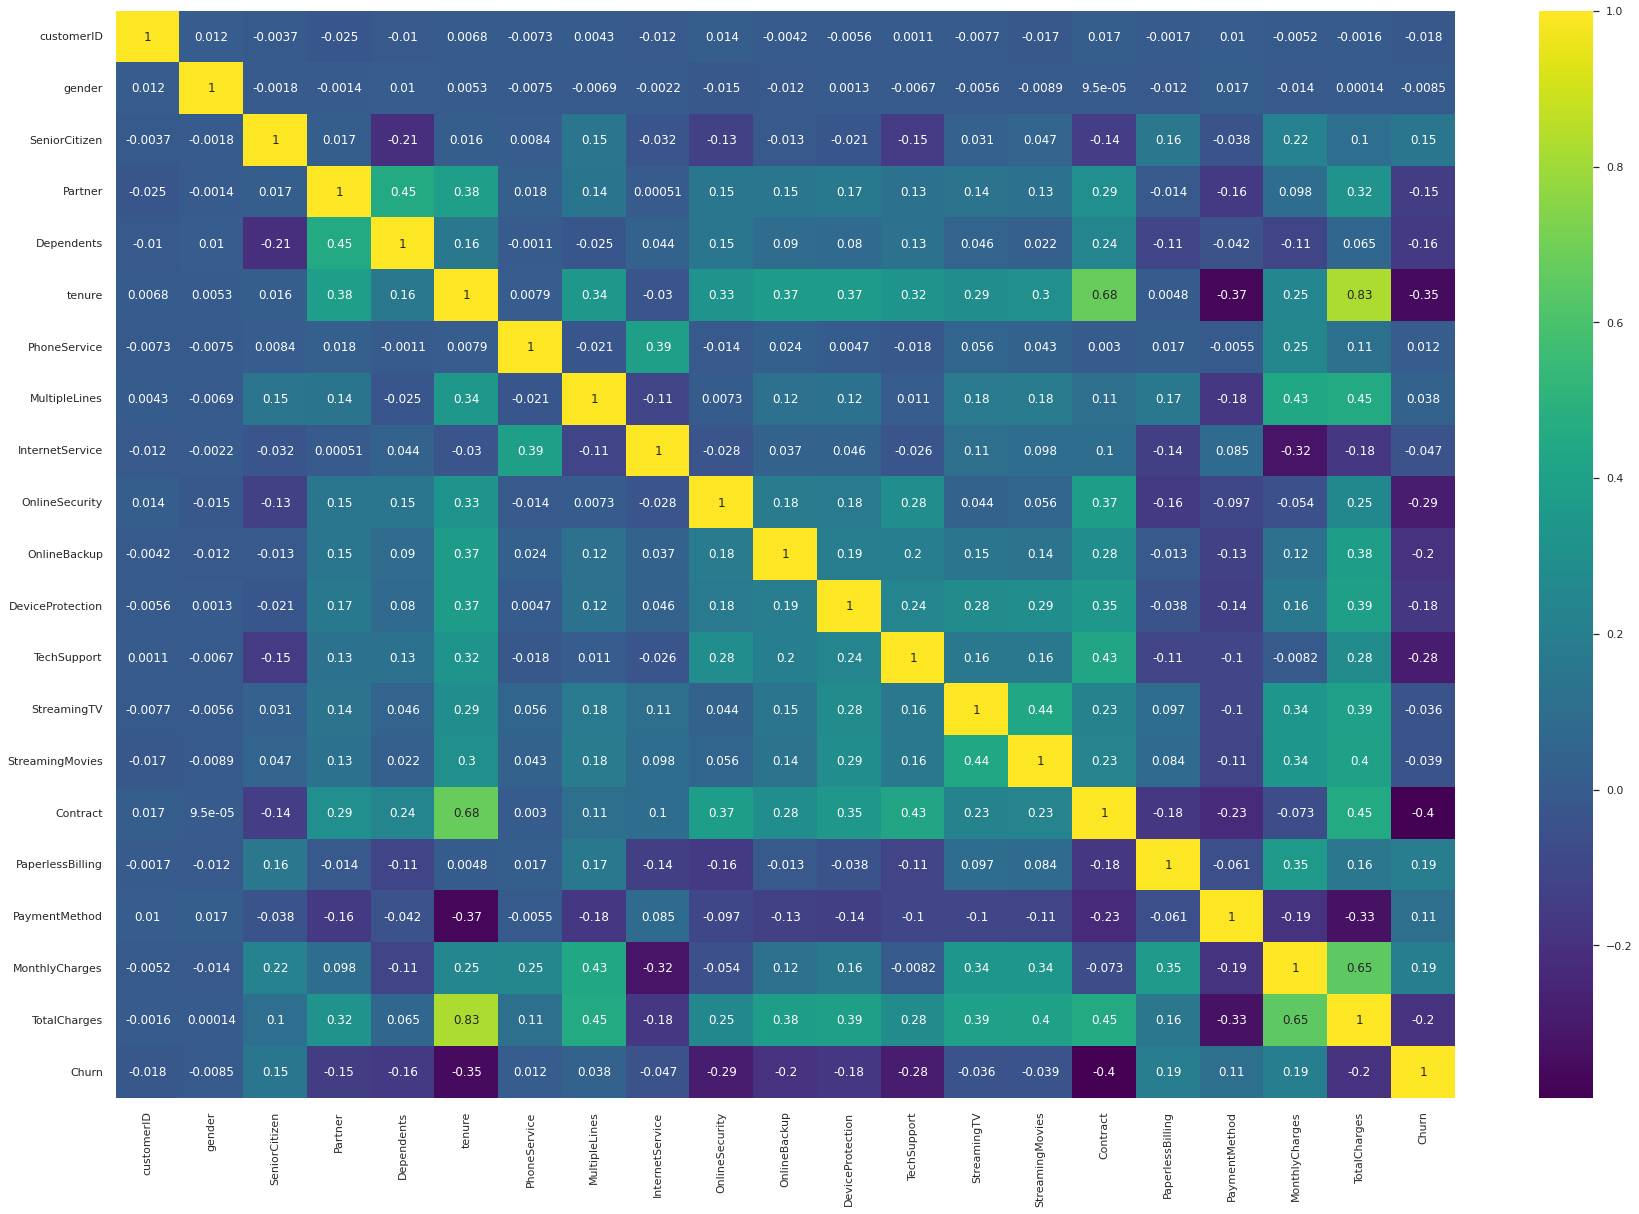

In [ ]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df_encoded.corr(), cmap='viridis', annot = True);

**Answer for Q1**: Contract has the highest correlation with churn.It has a -0.4 correlation which indicates a negative correlation 





**Q2: Which payment method has the highest churn rate?**

**Visualization**

In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Text(0.5, 0, 'PaymentMethod')

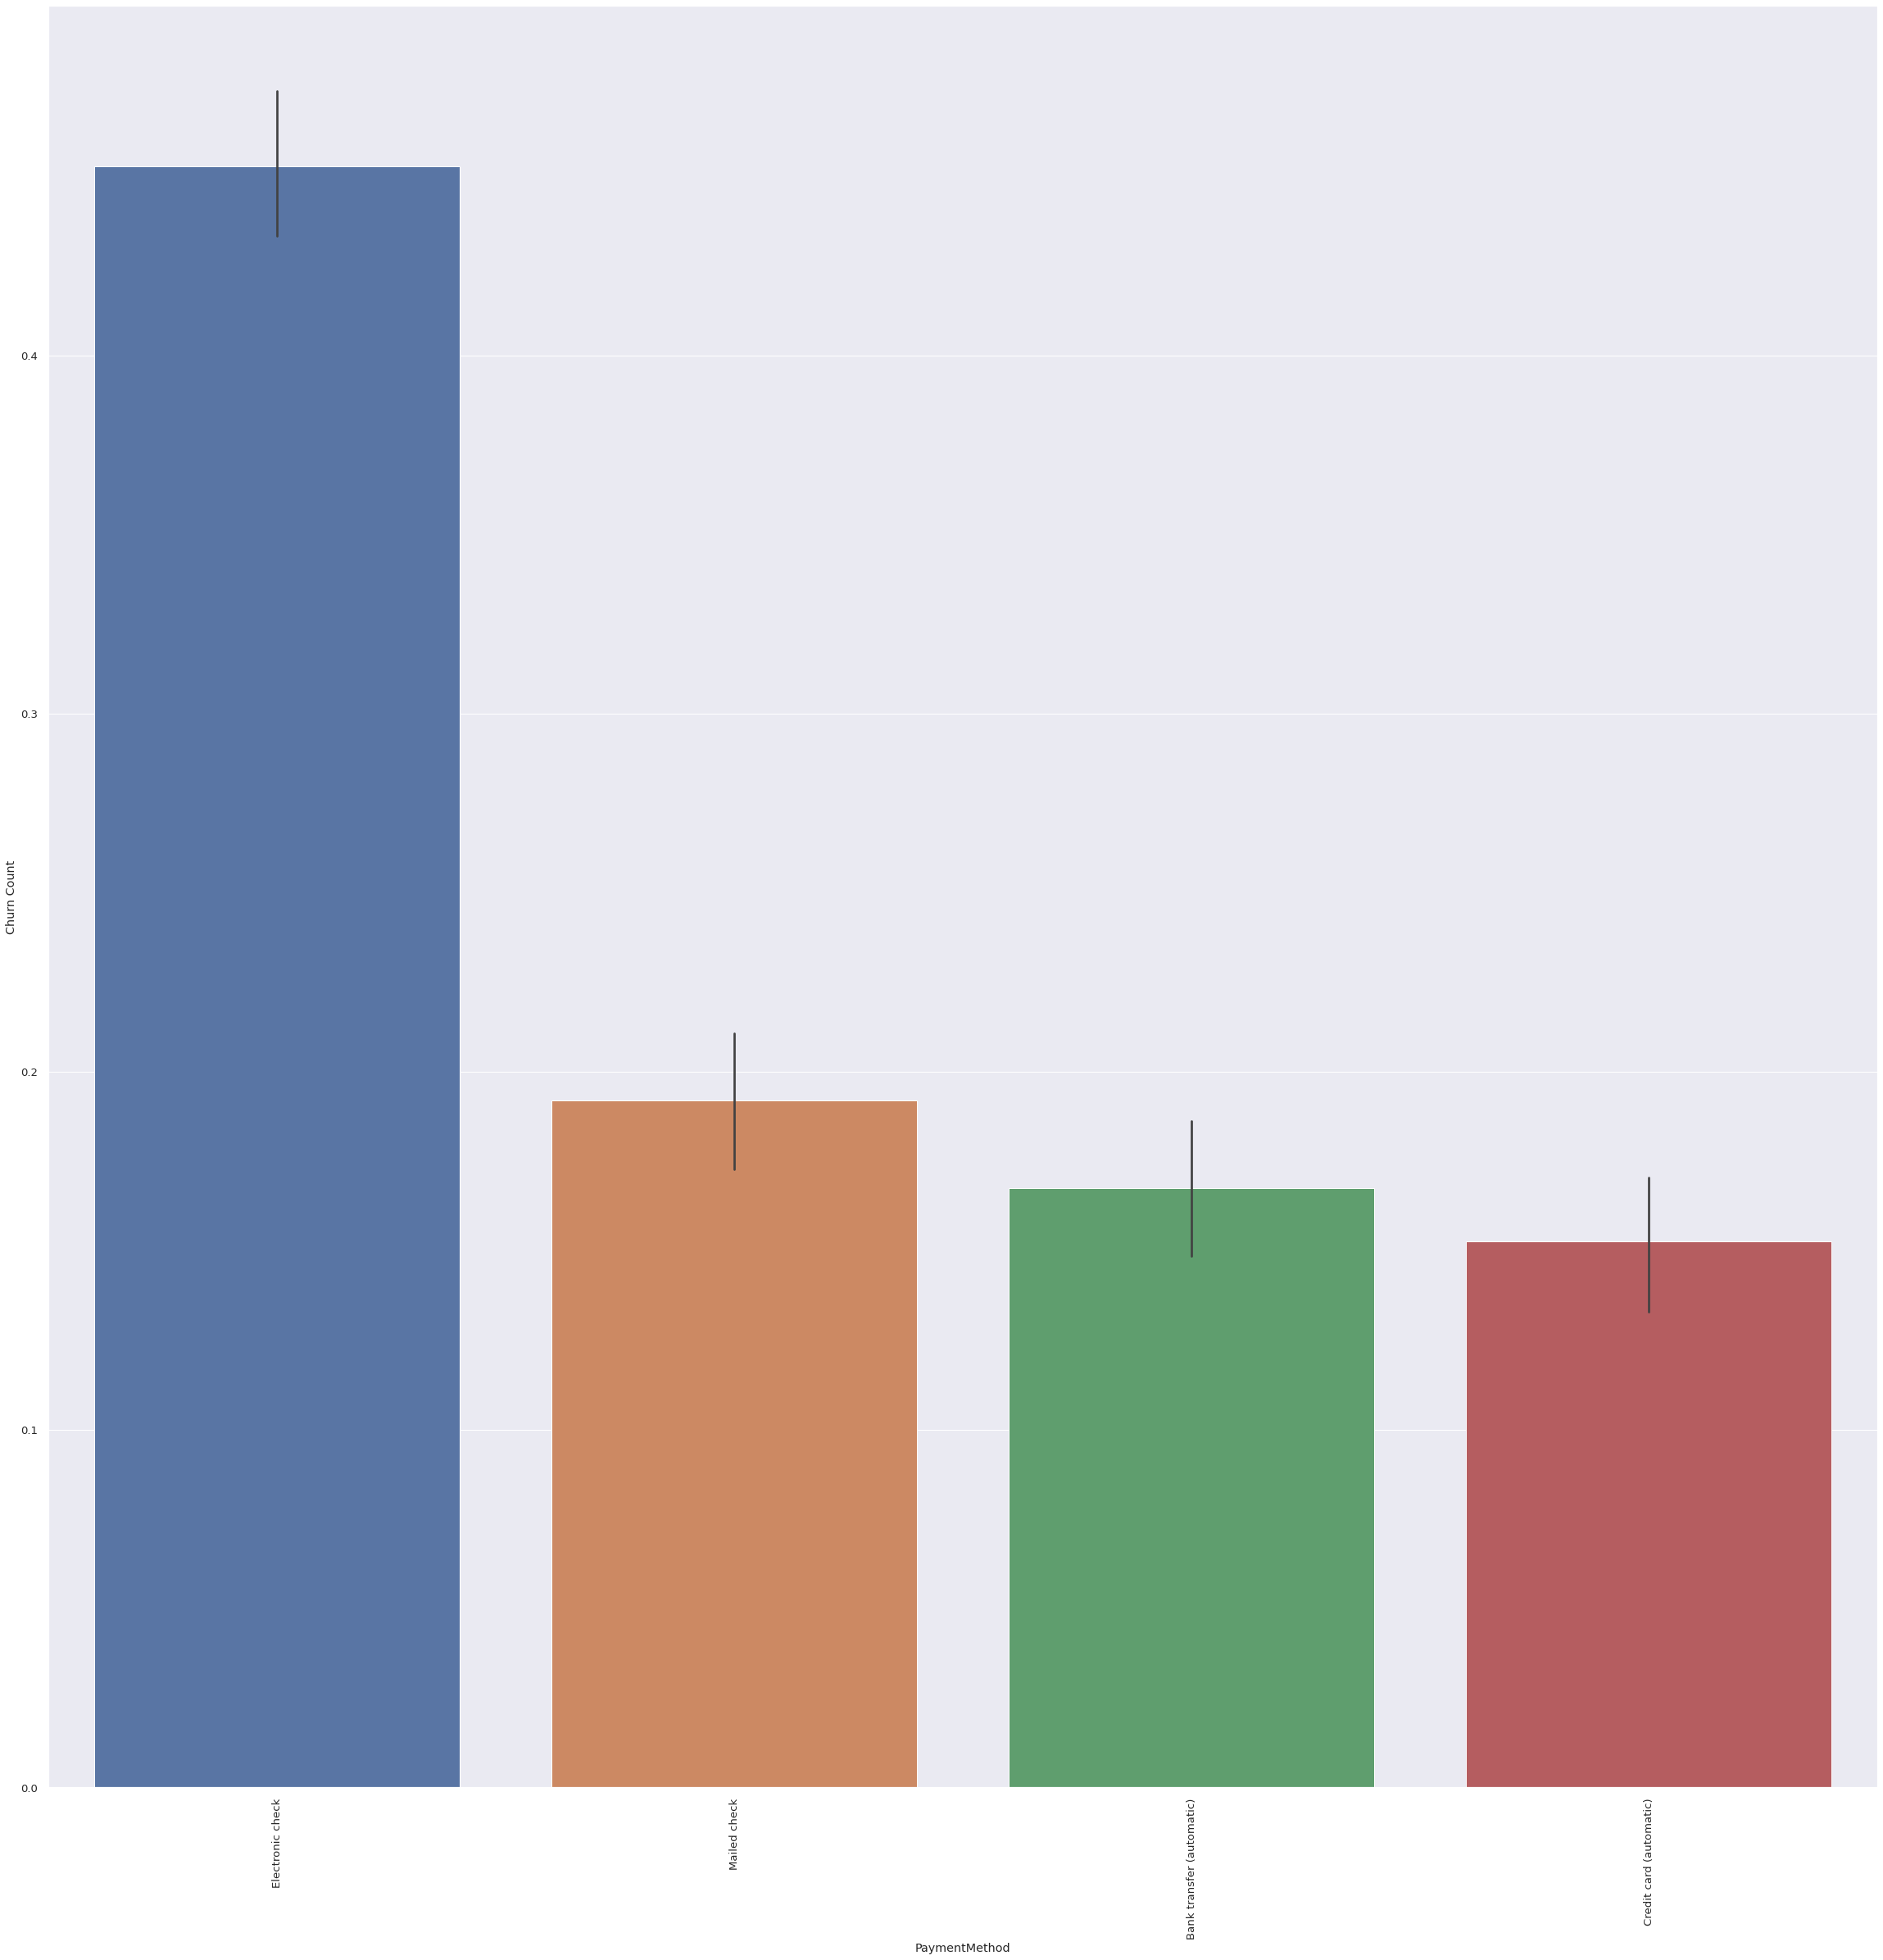

In [ ]:
# Plotting every feature average in relation to the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))
g = sns.barplot(x='PaymentMethod', y='Churn', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Churn Count')
plt.xlabel('PaymentMethod')

**Answer for Q2**: Electronic Check is the method with the highest churn rate

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

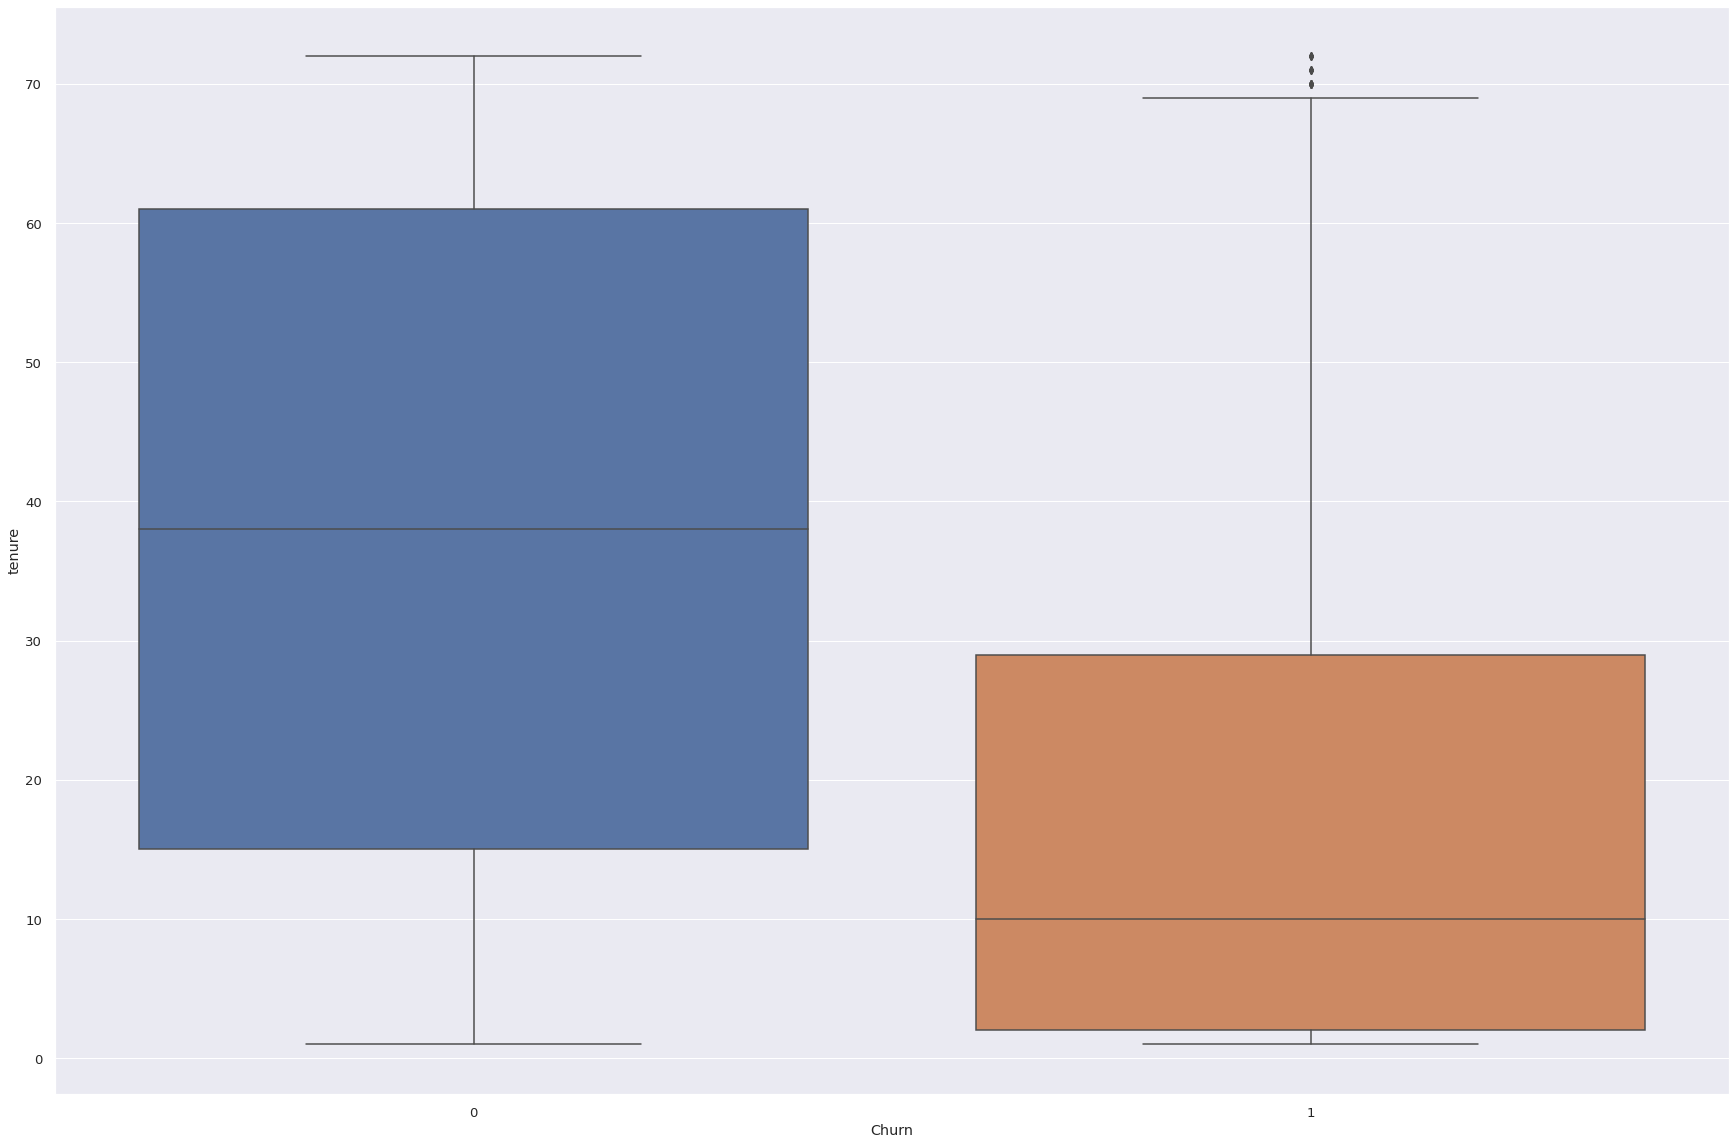

In [ ]:
sns.boxplot(data = df, x = 'Churn', y = 'tenure')

**Answer for Q3**: Customers commonly churns after 10 months


## Data Preparation for Modelling

In [ ]:
numerical_columns = [ 'tenure','TotalCharges', 'MonthlyCharges']


df[numerical_columns] = ( 
    
    df[numerical_columns] - df[numerical_columns].min()  
    
) /( 
    
    df[numerical_columns].max() - df[numerical_columns].min()
)

In [ ]:
categorical_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod','InternetService']
df = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   gender                                 7032 non-null   int8    
 1   SeniorCitizen                          7032 non-null   int8    
 2   Partner                                7032 non-null   int8    
 3   Dependents                             7032 non-null   int8    
 4   tenure                                 7032 non-null   float64 
 5   PhoneService                           7032 non-null   int8    
 6   Contract                               7032 non-null   category
 7   PaperlessBilling                       7032 non-null   int8    
 8   MonthlyCharges                         7032 non-null   float64 
 9   TotalCharges                           7032 non-null   float64 
 10  Churn                                  7032 non-null   int8 

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph
# alternatively, to export:
# graph.render('attrition')

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   3614.00 1308.00      1.00    4922.00       4922.00
_______________________________________________
Confusion Matrix: 
 [[3614    0]
 [   0 1308]]

Test Result:
Accuracy Score: 72.56%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.82   0.48      0.73       0.65          0.73
recall       0.81   0.50      0.73       0.65          0.73
f1-score     0.81   0.49      0.73       0.65          0.73
support   1549.00 561.00      0.73    2110.00       2110.00
_______________________________________________
Confusion Matrix: 
 [[1252  297]
 [

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.484375
Recall:  0.49732620320855614
F1_score:  0.49076517150395776


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


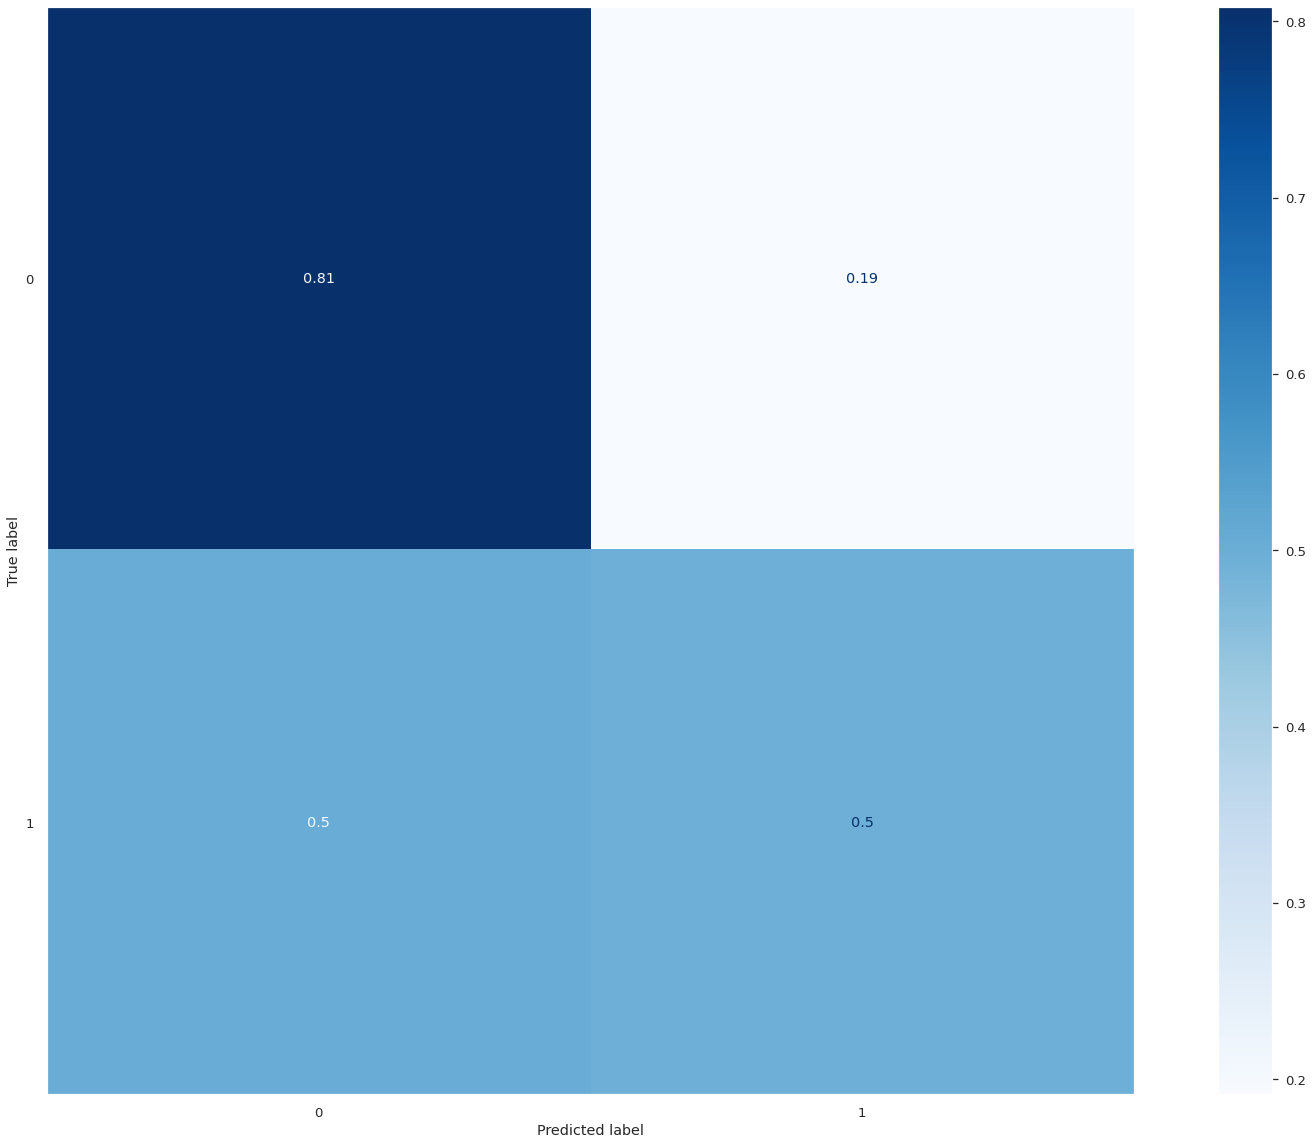

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_clf, X_test, y_test, cmap='Blues', normalize='true')
plt.grid(False)

## Bonus (Optional)

In [ ]:
# Import libraries and classes required for this example:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Calculate the accuracy of the model
print('Accuracy of the KNN model: ', knn.score(X_test, y_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = knn.predict(X_test)

print('Precision of the KNN model: ', precision_score(y_test, y_pred, average='macro'))

print('Recall of the KNN model: ', recall_score(y_test, y_pred, average='macro')) 

Accuracy of the KNN model:  0.7277896233120114
Precision of the KNN model:  0.6197591578257784
Recall of the KNN model:  0.5681378157176802
